# <center>Sentiment Analysis on Harvard University Reviews</center>

** **
## <center>*02 - Sentiment Analysis Notebook*</center>

This is the second and final notebook that composes this project. It will focus on the implementation of Lexicon-Based Models to the created feature *clean_text*.

After the implementation of those models, their results will be compared by means of different methods, such as Visualisations.

The most Negative Reviews will be the focus of the conclusion of this project, were the aim is to access why Reviewers gave a low Rating / bad review to Harvard University, aiming to improve what is required to please said Reviewers.

** **

This project was developed by <br><br>

*<center>António Oliveira - 2023039 - Industrial Applications of AI*

# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data) <br><br>
    
2. [Vader](#2.-Vader)
    
    2.1 [Visualisations](#2.1-Visualisations)<br><br>

3. [TextBlob](#3.-TextBlob)

    3.1 [Visualisations](#3.1-Visualisations) <br><br>

4. [SentiWordNet](#4.-SentiWordNet)

    4.1 [Normalised SentiWordNet](#4.1-Normalised-SentiWordNet)

    4.2 [Visualisations](#4.2-Visualisations) <br><br>

5. [AFINN](#5.-AFINN)

    5.1 [Normalised AFINN](#5.1-Normalised-AFINN)

    5.2 [Visualisations](#5.2-Visualisations)<br><br>

6. [Result Comparison](#6.-Result-Comparison)

## 1. Importing Data & Libraries

### 1.1 Libraries

In [14]:
import pandas as pd

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# SentiWordNet
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Scaler
from sklearn.preprocessing import MinMaxScaler

# external py file
import functions_SA as f_sa

# Warnings
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

Checking the functions in the external file

In [2]:
functions = [func for func in dir(f_sa) if callable(getattr(f_sa, func))]

# Print the list of functions
print("Functions in the external module:\n")
for func in functions:
    print(func+ '\n')

Functions in the external module:

Afinn

SentimentIntensityAnalyzer

TextBlob

get_sentiment_score

histogram

nltk_to_wordnet_pos

textblob_sa

vader_sa



### 1.2 Data

In [3]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/clean_data_v2.csv')
data.head(3)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,translated_text,contains_emoji,title_contains_emoji,no_emoji_text,clean_text,translated_title,no_emoji_title,clean_title
0,2023-12-28 13:02:14+00:00,Mobile,5,0,Best classes and good environment,Good thanks for everything good work group 👍 h...,3,28,12,2023,UTC,en,124,Good thanks for everything good work group 👍 h...,True,False,Good thanks for everything good work group thu...,Good thanks everything good work group thumbs_...,Best classes and good environment,Best classes and good environment,Best classes good environment
1,2023-12-12 05:38:26+00:00,Desktop,4,0,Harvard University,Harvard University was founded in 1636 and is ...,1,12,12,2023,UTC,en,322,Harvard University was founded in 1636 and is ...,False,False,Harvard University was founded in 1636 and is ...,Harvard University founded 1636 private Ivy Le...,Harvard University,Harvard University,Harvard University
2,2023-12-10 13:21:35+00:00,Mobile,3,0,Walk around campus,We did a walk around most of the Harvard Campu...,6,10,12,2023,UTC,en,301,We did a walk around most of the Harvard Campu...,False,False,We did a walk around most of the Harvard Campu...,"We walk around Harvard Campus, beautiful old, ...",Walk around campus,Walk around campus,Walk around campus


Dropping unnecessary columns

In [6]:
data = data.drop(['title', 'text', 'translated_text', 'contains_emoji',
                 'title_contains_emoji', 'no_emoji_text', 'translated_title',
                 'no_emoji_title', 'Timezone'], axis = 1)

In [8]:
data.head(2)

,published_date,published_platform,rating,helpful_votes,Hour,Day,Month,Year,language,char_count,clean_text,clean_title
0,2023-12-28 13:02:14+00:00,Mobile,5,0,3,28,12,2023,en,124,Good thanks everything good work group thumbs_...,Best classes good environment
1,2023-12-12 05:38:26+00:00,Desktop,4,0,1,12,12,2023,en,322,Harvard University founded 1636 private Ivy Le...,Harvard University


## 2. Vader

To begin the Sentiment Analysis process, *SentimentIntensityAnalyzer* is used. This is a VADER sentiment analysis tool that will enable the execution of sentiment analysis without training.

The aforementioned tool is implemented through the *vader_sa* function, available in the external *f_sa.py* file.

In [9]:
data["vader_compound"] = data["clean_text"].apply(lambda review : f_sa.vader_sa(str(review)))

data["vader_scores"] = data["clean_text"].apply(lambda review : f_sa.vader_sa(str(review), compound = False))

Here the *vader_compound* and *vader_scores* are displayed, along with the clean text from a review.

In [10]:
data[['clean_text', 'vader_compound', 'vader_scores']]

,clean_text,vader_compound,vader_scores
0,Good thanks everything good work group thumbs_...,0.9451,"{'neg': 0.0, 'neu': 0.368, 'pos': 0.632, 'comp..."
1,Harvard University founded 1636 private Ivy Le...,0.9476,"{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp..."
2,"We walk around Harvard Campus, beautiful old, ...",0.9217,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
3,We walk university grounds tour guide- tour cr...,0.8658,"{'neg': 0.026, 'neu': 0.716, 'pos': 0.258, 'co..."
4,Finally made Harvard!! This iconic university ...,0.9439,"{'neg': 0.039, 'neu': 0.829, 'pos': 0.132, 'co..."
...,...,...,...
3144,boston usually time go cambridge( subway) sudd...,0.6973,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."
3145,We hoped Harvard University tour would give us...,0.7575,"{'neg': 0.081, 'neu': 0.755, 'pos': 0.164, 'co..."
3146,"see city, study home one world's+ emblazoned u...",0.2263,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp..."
3147,"Hello, I studied Harvard Law School year there...",0.8012,"{'neg': 0.039, 'neu': 0.778, 'pos': 0.184, 'co..."


**Grouping observations by Rating**

In [11]:
data.groupby('rating')['vader_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,14.0,0.309457,0.595410,-0.8707,0.025675,0.50905,0.767450,0.9645
2,46.0,0.207811,0.579877,-0.8879,-0.183725,0.35890,0.675625,0.9785
3,262.0,0.549409,0.412308,-0.8503,0.396875,0.69745,0.862500,0.9782
4,1000.0,0.688329,0.315396,-0.7579,0.599400,0.80180,0.910000,0.9920
5,1827.0,0.746848,0.285583,-0.9468,0.699600,0.84420,0.924600,0.9981


### 2.1 Visualisations

**Polarity Histogram per Rating**

--------------------------------------------------------------------------------
                               rating:  5


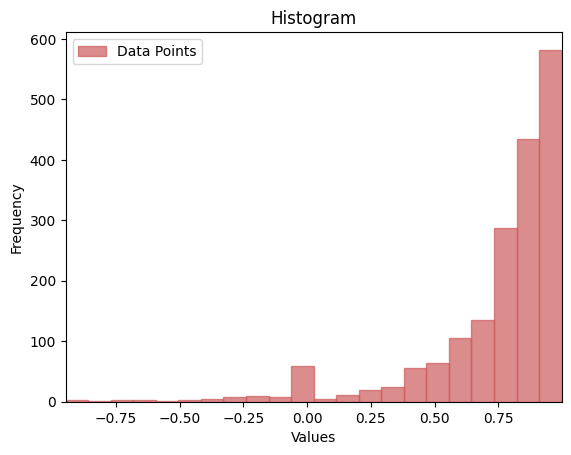


--------------------------------------------------------------------------------
                               rating:  4


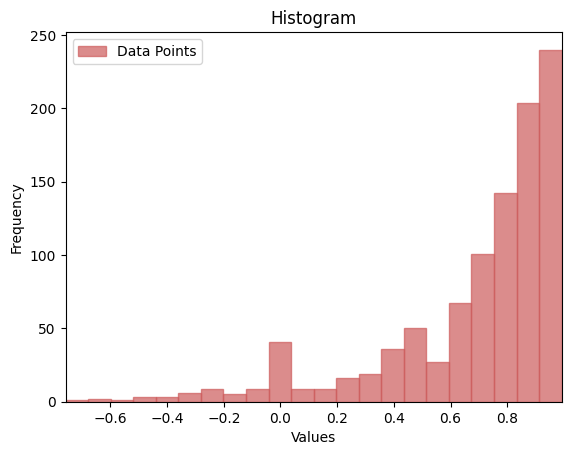


--------------------------------------------------------------------------------
                               rating:  3


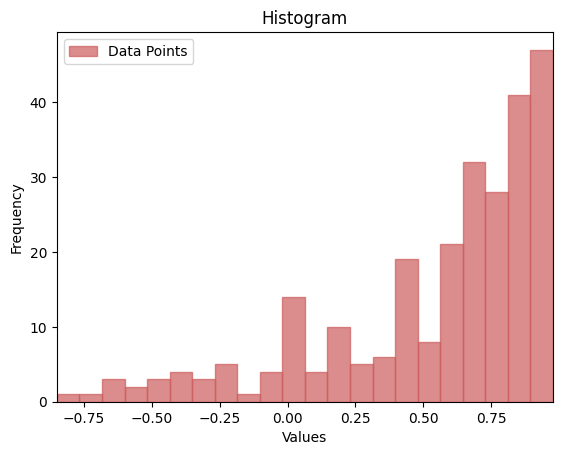


--------------------------------------------------------------------------------
                               rating:  1


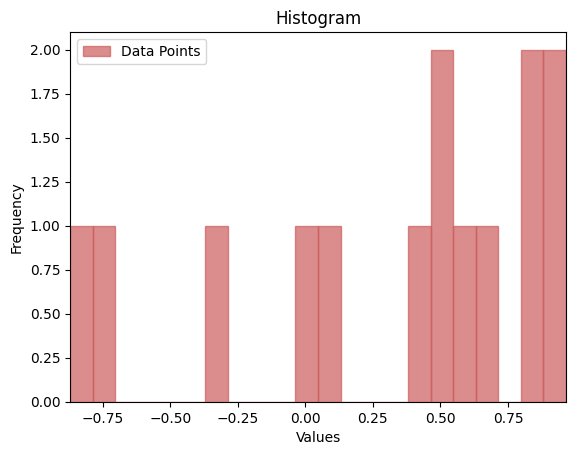


--------------------------------------------------------------------------------
                               rating:  2


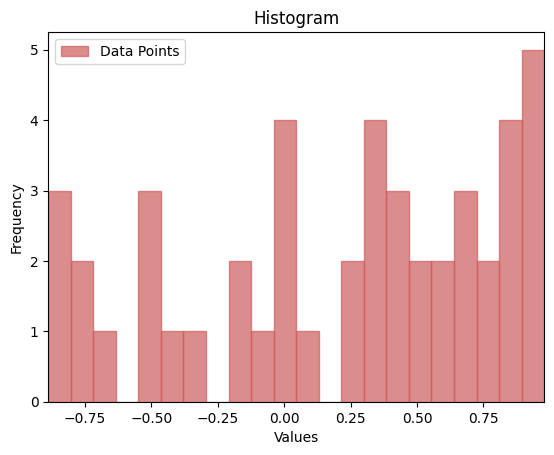

In [12]:
for rating in data['rating'].unique():
    print('--'*40)
    print(' '*30, f'rating:  {rating}')
    f_sa.histogram(data[data['rating']== rating]['vader_compound'])
    print('')

**Distribution of *vader_compound***

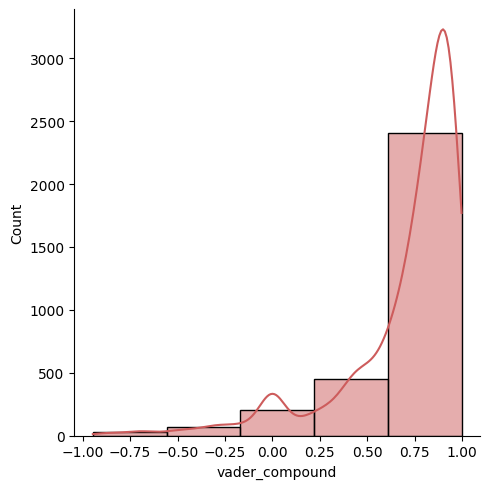

In [15]:
sns.displot(data["vader_compound"], kde=True, bins=5, color = 'indianred')
plt.show()

**Polarity Boxplots per Language**

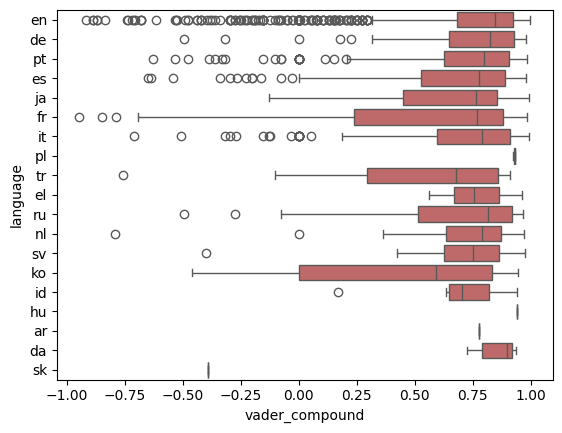

In [16]:
sns.boxplot(data=data, x="vader_compound", y="language", color = 'indianred')
plt.show()

## 3. TextBlob

To conduct a more in-depth sentiment analysis on these lyrics, *TextBlob* is employed. 

In [17]:
data["textblob_compound"] = data["clean_text"].apply(lambda review : f_sa.textblob_sa(str(review)))

Here the textblob_compound is displayed, along with the clean text from a review.

In [18]:
data[['clean_text', 'textblob_compound']]

,clean_text,textblob_compound
0,Good thanks everything good work group thumbs_...,0.500000
1,Harvard University founded 1636 private Ivy Le...,0.446667
2,"We walk around Harvard Campus, beautiful old, ...",0.312500
3,We walk university grounds tour guide- tour cr...,0.264286
4,Finally made Harvard!! This iconic university ...,0.248661
...,...,...
3144,boston usually time go cambridge( subway) sudd...,-0.083333
3145,We hoped Harvard University tour would give us...,0.158333
3146,"see city, study home one world's+ emblazoned u...",0.300000
3147,"Hello, I studied Harvard Law School year there...",0.088690


**Grouping observations by Rating**

In [19]:
data.groupby('rating')['textblob_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,14.0,0.128515,0.221682,-0.176429,0.024777,0.119916,0.239881,0.550000
2,46.0,0.082008,0.244994,-0.650000,-0.039564,0.093260,0.266756,0.666667
3,262.0,0.233584,0.218512,-0.800000,0.140848,0.250000,0.358929,1.000000
4,1000.0,0.328507,0.207606,-0.666667,0.201875,0.318264,0.450000,1.000000
5,1827.0,0.373776,0.218689,-1.000000,0.236845,0.366667,0.500000,1.000000


### 3.1 Visualisations

**Polarity Histogram per Rating**

--------------------------------------------------------------------------------
                               rating:  5


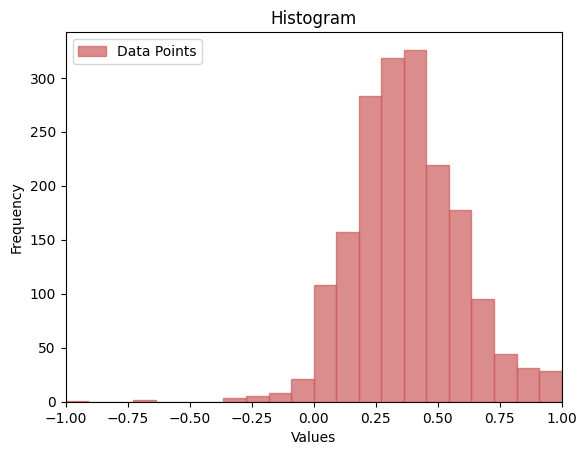


--------------------------------------------------------------------------------
                               rating:  4


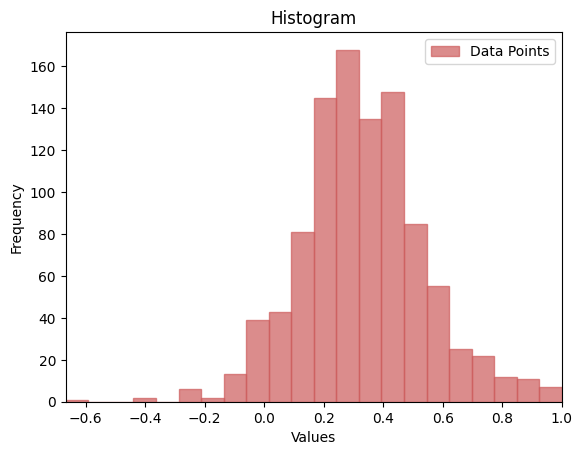


--------------------------------------------------------------------------------
                               rating:  3


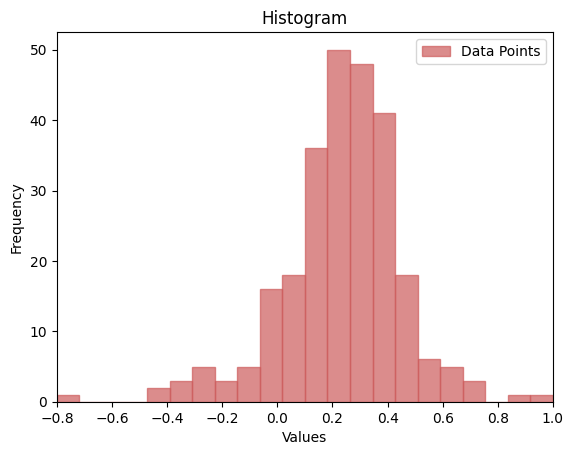


--------------------------------------------------------------------------------
                               rating:  1


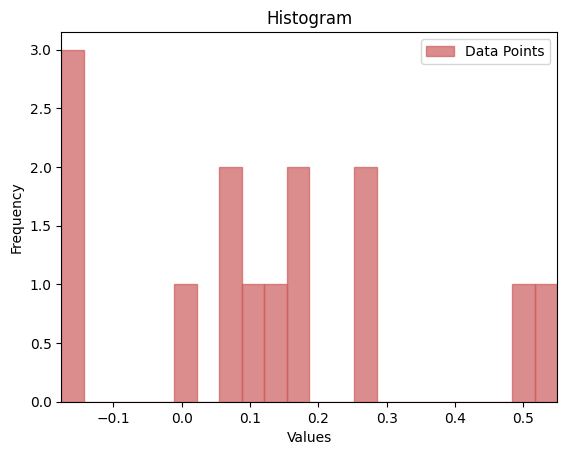


--------------------------------------------------------------------------------
                               rating:  2


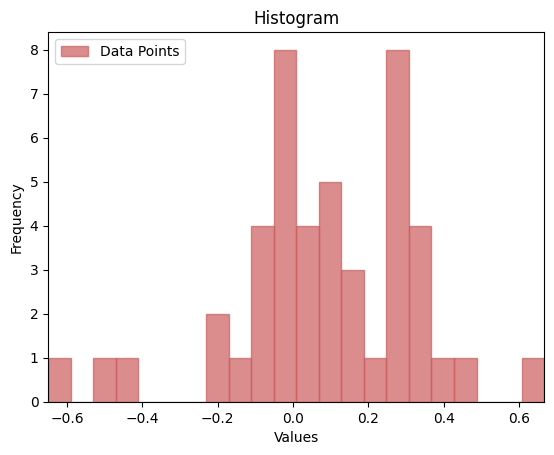

In [20]:
for rating in data['rating'].unique():
    print('--'*40)
    print(' '*30, f'rating:  {rating}')
    f_sa.histogram(data[data['rating']== rating]['textblob_compound'])
    print('')

**Distribution of *textblob_compound***

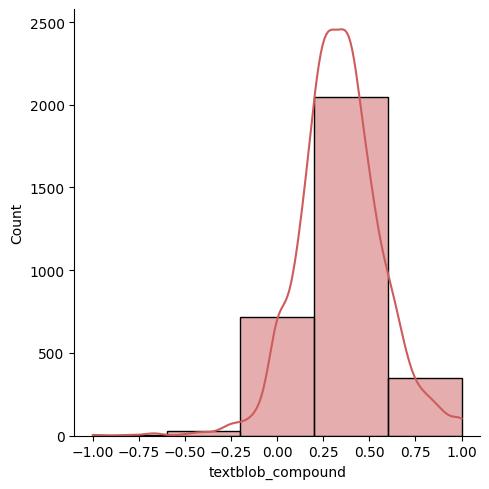

In [21]:
sns.displot(data["textblob_compound"], kde=True, bins=5, color = 'indianred')
plt.show()

**Polarity Boxplots per Language**

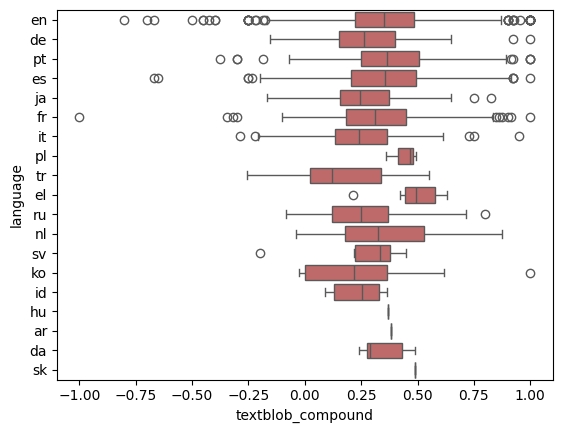

In [22]:
sns.boxplot(data=data, x="textblob_compound", y="language", color = 'indianred')
plt.show()

## 4. SentiWordNet

To continue the in-depth sentiment analysis on these reviews, *SentiWordNet* is employed.

To start the process, it is needed to tokenize the clean text. 

In [23]:
data['tokenized_text'] = data['clean_text'].apply(lambda x: word_tokenize(x))

It is also important to attach a tag to each word in order to know its part of speech, based on its definition and context. This is conducted in the cell below, using the function *pos_tag*.

In [24]:
data['pos_tags'] = data['tokenized_text'].apply(lambda x: pos_tag(x))

Now, we still need to convert POS tags from the NLTK format to the WordNet format. <br>

The code below uses a function, *nltk_to_wordnet_pos*, for converting NLTK POS tags to WordNet format. Applied to a DataFrame column ('pos_tags'), it creates a new column ('wordnet_pos_tags') with WordNet POS tags for each word.


In [25]:
# Convert NLTK POS tags to WordNet POS tags
data['wordnet_pos_tags'] = data['pos_tags'].apply(
    lambda tags: [(word, f_sa.nltk_to_wordnet_pos(pos)) for word, pos in tags if f_sa.nltk_to_wordnet_pos(pos) is not None]
)

Computing the compounded polarity scores of SentiWordNet and displaying the results.

In [26]:
# Calculate sentiment scores and interpret the overall sentiment
data['swn_compound'] = data['wordnet_pos_tags'].apply(
    lambda pos_tags: sum(f_sa.get_sentiment_score(word, pos) for word, pos in pos_tags)
)


# Display the resulting DataFrame
data[['clean_text', 'swn_compound']]

,clean_text,swn_compound
0,Good thanks everything good work group thumbs_...,2.500
1,Harvard University founded 1636 private Ivy Le...,0.250
2,"We walk around Harvard Campus, beautiful old, ...",2.125
3,We walk university grounds tour guide- tour cr...,1.500
4,Finally made Harvard!! This iconic university ...,5.000
...,...,...
3144,boston usually time go cambridge( subway) sudd...,1.375
3145,We hoped Harvard University tour would give us...,0.125
3146,"see city, study home one world's+ emblazoned u...",0.000
3147,"Hello, I studied Harvard Law School year there...",0.500


### 4.1 Normalised SentiWordNet

To have more intuitive polarity values, the resulting SentiWordNet polarity scores are normalized, using *MinMaxScaler* with a range between -1 and 1.

In [27]:
scaler = MinMaxScaler(feature_range = (-1,1))

# Convert Column to Numpy Array and Reshape
swnt_norm_polarity = scaler.fit_transform(data["swn_compound"].to_numpy().reshape(-1, 1))

# Reshape the Transformed Data
data["swn_compound_norm"] = swnt_norm_polarity.reshape(-1)

Here the swn_compound and swn_compound_norm are displayed, along with the clean text from a review.

In [28]:
data[['clean_text', 'swn_compound', 'swn_compound_norm']]

,clean_text,swn_compound,swn_compound_norm
0,Good thanks everything good work group thumbs_...,2.500,0.054945
1,Harvard University founded 1636 private Ivy Le...,0.250,-0.340659
2,"We walk around Harvard Campus, beautiful old, ...",2.125,-0.010989
3,We walk university grounds tour guide- tour cr...,1.500,-0.120879
4,Finally made Harvard!! This iconic university ...,5.000,0.494505
...,...,...,...
3144,boston usually time go cambridge( subway) sudd...,1.375,-0.142857
3145,We hoped Harvard University tour would give us...,0.125,-0.362637
3146,"see city, study home one world's+ emblazoned u...",0.000,-0.384615
3147,"Hello, I studied Harvard Law School year there...",0.500,-0.296703


**Grouping observations by Rating**

In [29]:
data.groupby('rating')['swn_compound_norm'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,14.0,-0.177394,0.266778,-0.472527,-0.368132,-0.230769,-0.076923,0.538462
2,46.0,-0.342093,0.217246,-1.000000,-0.472527,-0.340659,-0.208791,0.054945
3,262.0,-0.239716,0.210709,-0.824176,-0.384615,-0.274725,-0.126374,0.824176
4,1000.0,-0.193824,0.209376,-0.824176,-0.340659,-0.230769,-0.076923,1.000000
5,1827.0,-0.177190,0.200188,-0.714286,-0.318681,-0.208791,-0.076923,0.912088


### 4.2 Visualisations

**Polarity Histogram per Rating**

--------------------------------------------------------------------------------
                               rating:  5


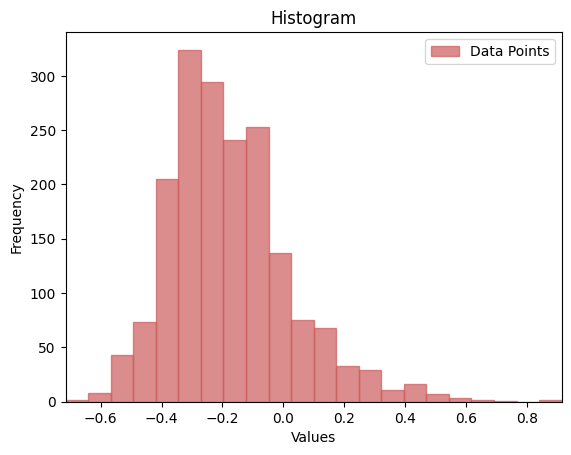


--------------------------------------------------------------------------------
                               rating:  4


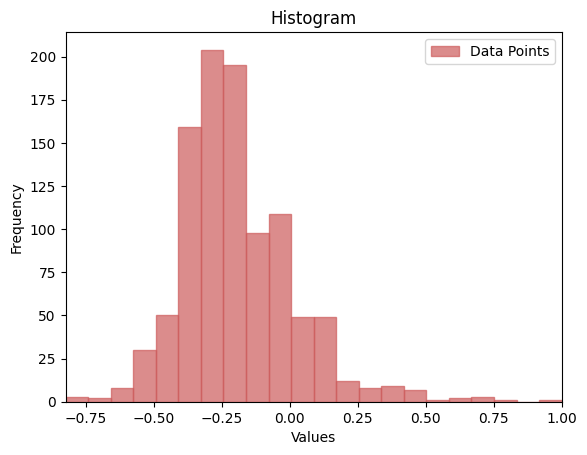


--------------------------------------------------------------------------------
                               rating:  3


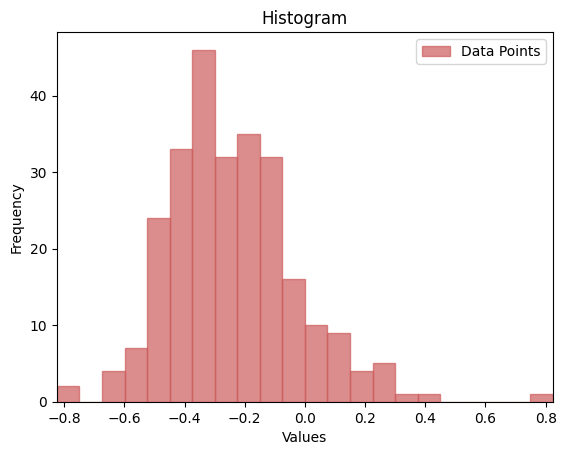


--------------------------------------------------------------------------------
                               rating:  1


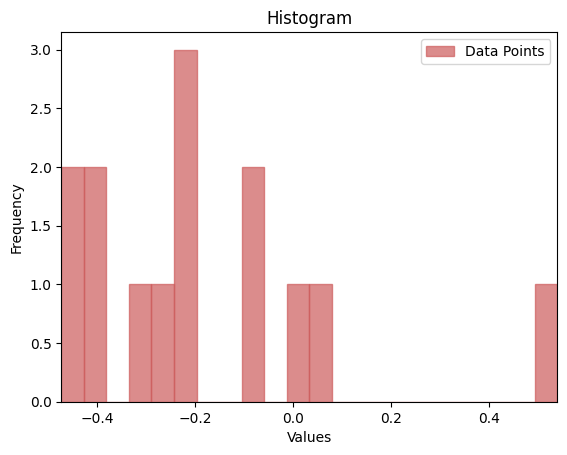


--------------------------------------------------------------------------------
                               rating:  2


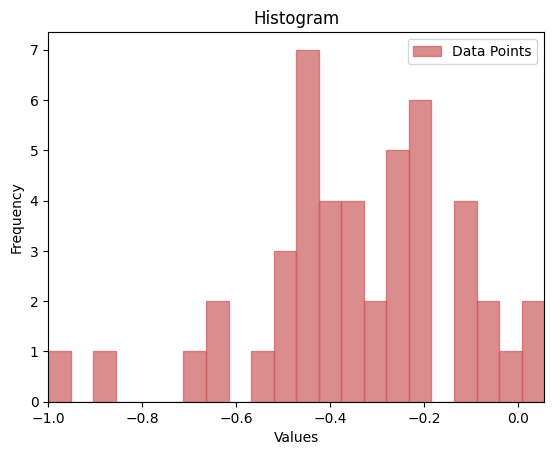

In [30]:
for rating in data['rating'].unique():
    print('--'*40)
    print(' '*30, f'rating:  {rating}')
    f_sa.histogram(data[data['rating']== rating]['swn_compound_norm'])
    print('')

**Distribution of *swn_compound_norm***

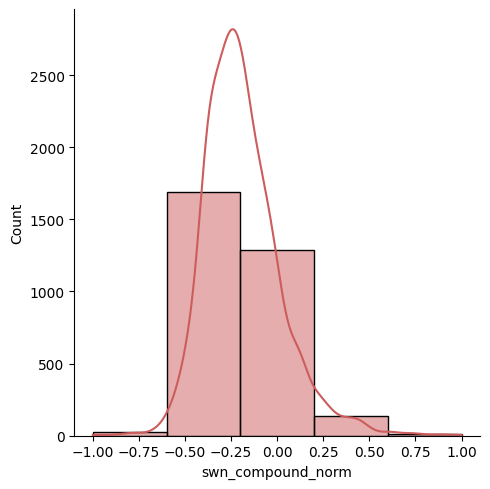

In [31]:
sns.displot(data["swn_compound_norm"], kde=True, bins=5, color = 'indianred')
plt.show()

**Polarity Boxplots per Language**

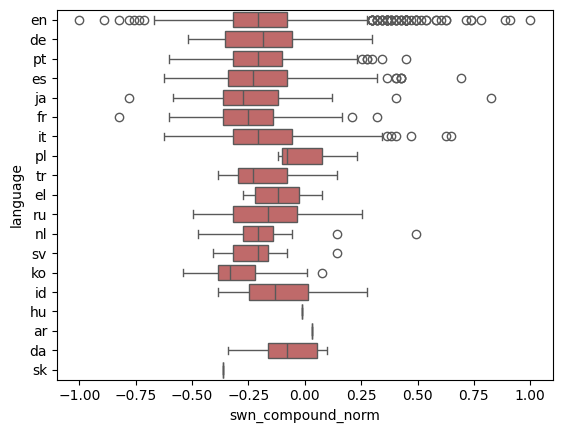

In [32]:
sns.boxplot(data=data, x="swn_compound_norm", y="language", color = 'indianred')
plt.show()

## 5. AFINN

The final method to be used is *AFINN*.

In [33]:
data['afinn_compound'] = data['clean_text'].apply(lambda x: 
                                              f_sa.afinn.score(x))

In [34]:
data[['clean_text', 'afinn_compound']]

,clean_text,afinn_compound
0,Good thanks everything good work group thumbs_...,15.0
1,Harvard University founded 1636 private Ivy Le...,9.0
2,"We walk around Harvard Campus, beautiful old, ...",11.0
3,We walk university grounds tour guide- tour cr...,6.0
4,Finally made Harvard!! This iconic university ...,11.0
...,...,...
3144,boston usually time go cambridge( subway) sudd...,3.0
3145,We hoped Harvard University tour would give us...,17.0
3146,"see city, study home one world's+ emblazoned u...",2.0
3147,"Hello, I studied Harvard Law School year there...",7.0


### 5.1 Normalised AFINN

To have more intuitive polarity values, the resulting AFINN polarity scores are normalized, using *MinMaxScaler* with a range between -1 and 1.

In [35]:
# Scale, Convert Column to Numpy Array and Reshape
afinn_norm = scaler.fit_transform(data["afinn_compound"].to_numpy().reshape(-1, 1))

# Reshape the Transformed Data
data["afinn_norm_compound"] = afinn_norm.reshape(-1)

Here the afinn_compound and afinn_norm_compound are displayed, along with the clean text from a review.

In [36]:
data[['clean_text', 'afinn_compound', 'afinn_norm_compound']]

,clean_text,afinn_compound,afinn_norm_compound
0,Good thanks everything good work group thumbs_...,15.0,-0.277778
1,Harvard University founded 1636 private Ivy Le...,9.0,-0.444444
2,"We walk around Harvard Campus, beautiful old, ...",11.0,-0.388889
3,We walk university grounds tour guide- tour cr...,6.0,-0.527778
4,Finally made Harvard!! This iconic university ...,11.0,-0.388889
...,...,...,...
3144,boston usually time go cambridge( subway) sudd...,3.0,-0.611111
3145,We hoped Harvard University tour would give us...,17.0,-0.222222
3146,"see city, study home one world's+ emblazoned u...",2.0,-0.638889
3147,"Hello, I studied Harvard Law School year there...",7.0,-0.500000


**Grouping observations by Rating**

In [37]:
data.groupby('rating')['afinn_norm_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,14.0,-0.605159,0.121901,-0.750000,-0.687500,-0.652778,-0.520833,-0.333333
2,46.0,-0.615942,0.153414,-0.888889,-0.715278,-0.638889,-0.555556,-0.111111
3,262.0,-0.550042,0.127348,-0.805556,-0.638889,-0.555556,-0.500000,0.083333
4,1000.0,-0.510083,0.141877,-0.833333,-0.611111,-0.527778,-0.444444,0.305556
5,1827.0,-0.488475,0.156571,-1.000000,-0.583333,-0.500000,-0.416667,1.000000


### 5.2 Visualisations

**Polarity Histogram per Rating**

--------------------------------------------------------------------------------
                               rating:  5


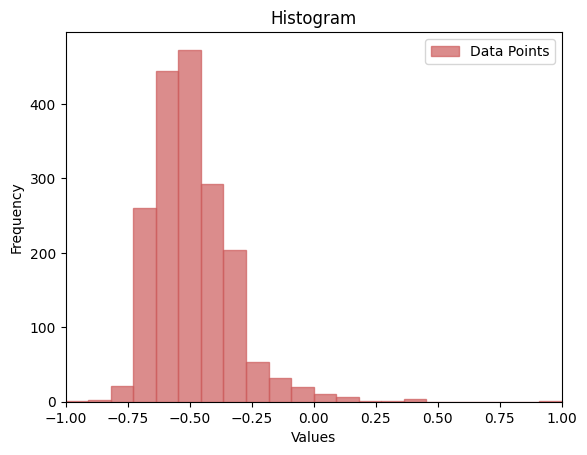


--------------------------------------------------------------------------------
                               rating:  4


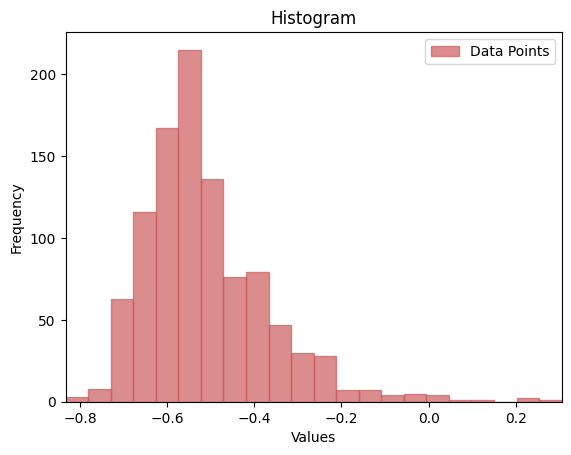


--------------------------------------------------------------------------------
                               rating:  3


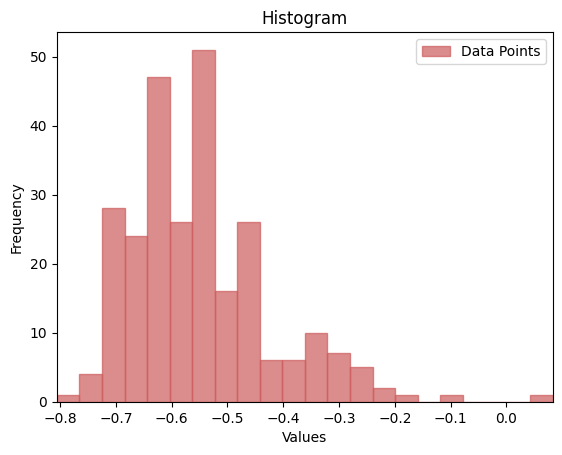


--------------------------------------------------------------------------------
                               rating:  1


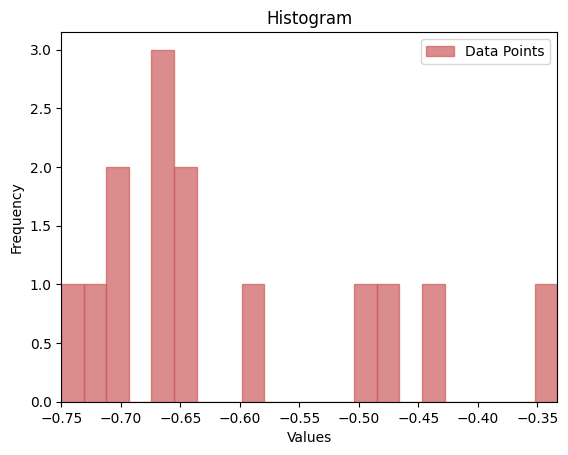


--------------------------------------------------------------------------------
                               rating:  2


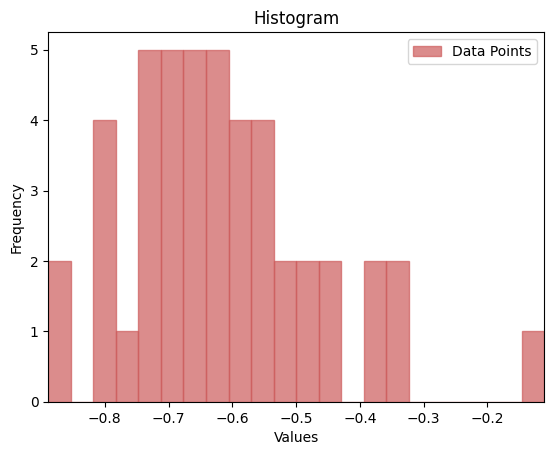

In [38]:
for rating in data['rating'].unique():
    print('--'*40)
    print(' '*30, f'rating:  {rating}')
    f_sa.histogram(data[data['rating']== rating]['afinn_norm_compound'])
    print('')

**Distribution of *afinn_norm_compound***

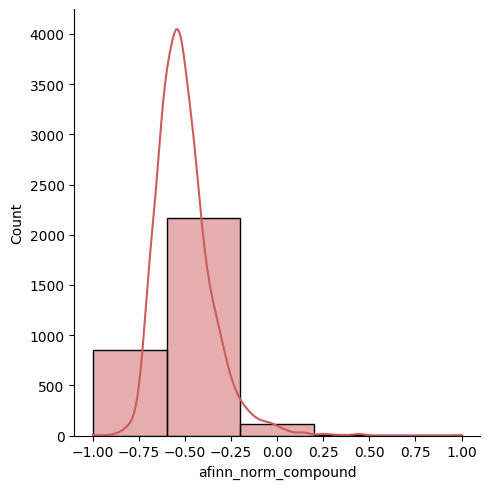

In [39]:
sns.displot(data["afinn_norm_compound"], kde=True, bins=5, color = 'indianred')
plt.show()

**Polarity Boxplots per Language**

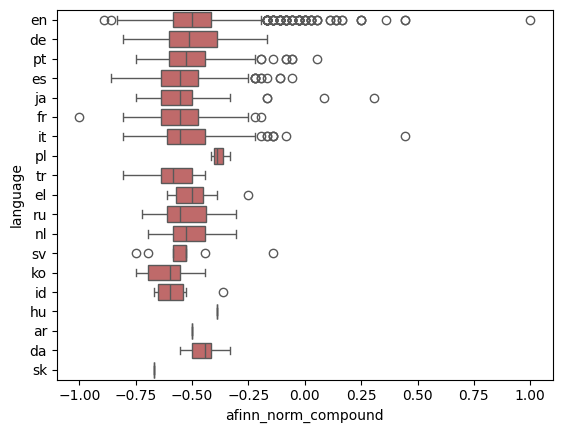

In [40]:
sns.boxplot(data=data, x="afinn_norm_compound", y="language", color = 'indianred')
plt.show()

## 6. Result Comparison

Before comparing the results, the unnecessary columns are dropped from the dataframe in hands.

In [41]:
columns_to_drop = ['tokenized_text', 'pos_tags', 'wordnet_pos_tags']
data.drop(columns=columns_to_drop, inplace=True)

To further explore and gain insights, the *.describe* method is employed on each method's results corresponding column. 

In [42]:
data[['vader_compound', 'textblob_compound','swn_compound', 'swn_compound_norm', 'afinn_compound', 'afinn_norm_compound']].describe()

,vader_compound,textblob_compound,swn_compound,swn_compound_norm,afinn_compound,afinn_norm_compound
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000
mean,0.702019,0.342384,1.106397,-0.190084,6.897745,-0.502840
std,0.326587,0.221925,1.171838,0.206037,5.448414,0.151345
min,-0.946800,-1.000000,-3.500000,-1.000000,-11.000000,-1.000000
25%,0.624900,0.208333,0.375000,-0.318681,3.000000,-0.611111
50%,0.822500,0.337500,1.000000,-0.208791,6.000000,-0.527778
75%,0.916900,0.475000,1.750000,-0.076923,9.000000,-0.444444
max,0.998100,1.000000,7.875000,1.000000,61.000000,1.000000


As one can see, the normalised compounds of *SentiWordNet* and *AFINN* have a much lower mean than the non-normalised . Even when comparing with the other algorithms, which by default already produce compounds between -1 and 1, *swn_compound_norm* and *afinn_norm_compound* still show a very low mean. This issue will be explored and addressed in the next steps.

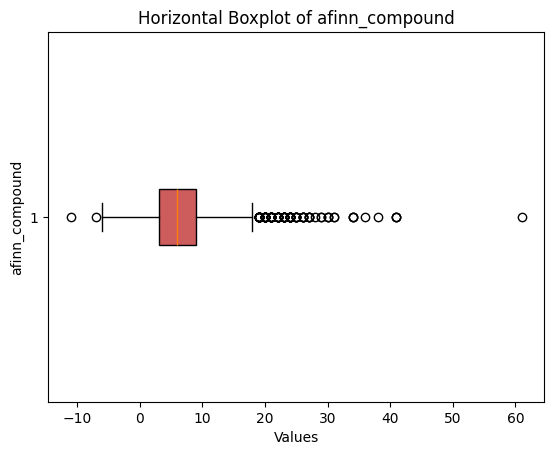

In [43]:
plt.boxplot(data['afinn_compound'], patch_artist=True, 
            boxprops=dict(facecolor='indianred'), vert=False)

# Adding a title and labels
plt.title('Horizontal Boxplot of afinn_compound')
plt.xlabel('Values')
plt.ylabel('afinn_compound')

# Displaying the plot
plt.show()

As one can see from the boxplot displayed above, the majority of observations are concentrated between ~5-20, with some outliers bigger than 20. This was to be expected, since in the previous notebook we noticed an abundance of positive Ratings, which are usually correlated with a positive Review.

Consequently when normalising, this will skew the data towards more negative values, even if the transmited sentiment is positive, as most observations were found to have a positive *afinn_compound*.

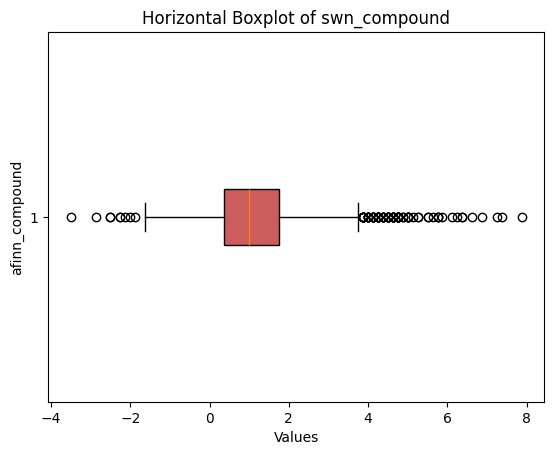

In [44]:
plt.boxplot(data['swn_compound'], patch_artist=True, 
            boxprops=dict(facecolor='indianred'), vert=False)

# Adding a title and labels
plt.title('Horizontal Boxplot of swn_compound')
plt.xlabel('Values')
plt.ylabel('afinn_compound')

# Displaying the plot
plt.show()

A similar thing happens with SentiWordNet, even if not as noticeable as with AFINN.

After carefull consideration, no solution was found to this problem. As so, one must always consider this when making conclusions about both these algorithms

To delve even further and obtain insights, the *.describe* method is applied to the columns corresponding to the results of each method, followed by the grouping of data by the *rating* attribute. Consequently, this approach provides a means of understanding the distribution of sentiment analysis for reviews within each distinct *rating*.

In [45]:
compare = ['vader_compound', 'textblob_compound', 'swn_compound_norm', 'afinn_norm_compound']

for i in range(len(compare)):
    print(compare[i] + '\n')
    print(data.groupby('rating')[compare[i]].describe())
    print('\n')

vader_compound

         count      mean       std     min       25%      50%       75%  \
rating                                                                    
1         14.0  0.309457  0.595410 -0.8707  0.025675  0.50905  0.767450   
2         46.0  0.207811  0.579877 -0.8879 -0.183725  0.35890  0.675625   
3        262.0  0.549409  0.412308 -0.8503  0.396875  0.69745  0.862500   
4       1000.0  0.688329  0.315396 -0.7579  0.599400  0.80180  0.910000   
5       1827.0  0.746848  0.285583 -0.9468  0.699600  0.84420  0.924600   

           max  
rating          
1       0.9645  
2       0.9785  
3       0.9782  
4       0.9920  
5       0.9981  


textblob_compound

         count      mean       std       min       25%       50%       75%  \
rating                                                                       
1         14.0  0.128515  0.221682 -0.176429  0.024777  0.119916  0.239881   
2         46.0  0.082008  0.244994 -0.650000 -0.039564  0.093260  0.266756   
3     

**Mean Polarity per Rating**

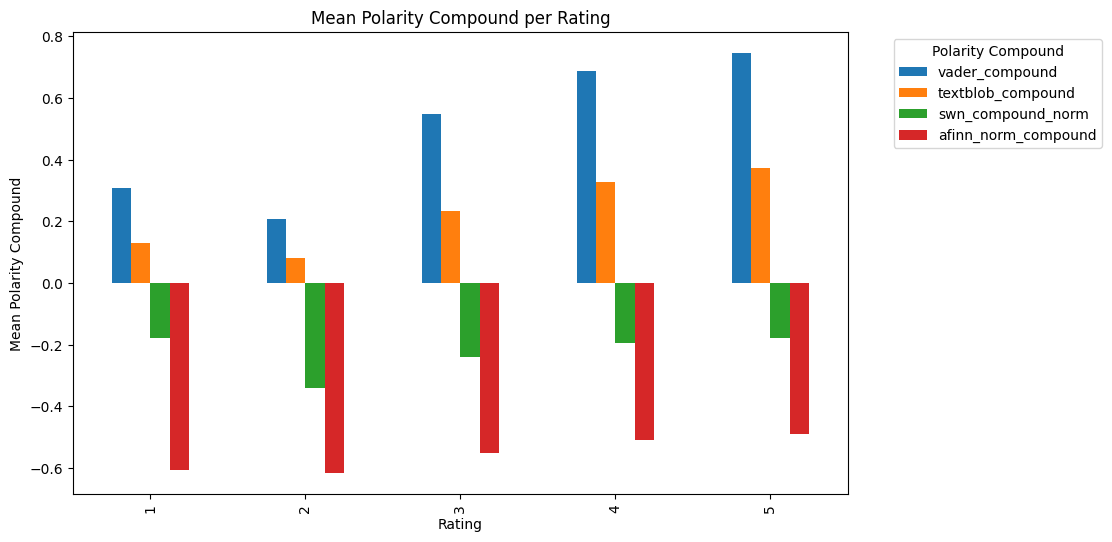

In [46]:
means_by_tag = data.groupby('rating')[compare].mean()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Polarity Compound per Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This plot shows us that, as expected, the higher the rating, the more positive is the review. However, in most of the implement algorithms it looks like reviews with rating 2 are more negative than the ones with rating 1, as the average compounds are lower.

**Mean Polarity per Language**

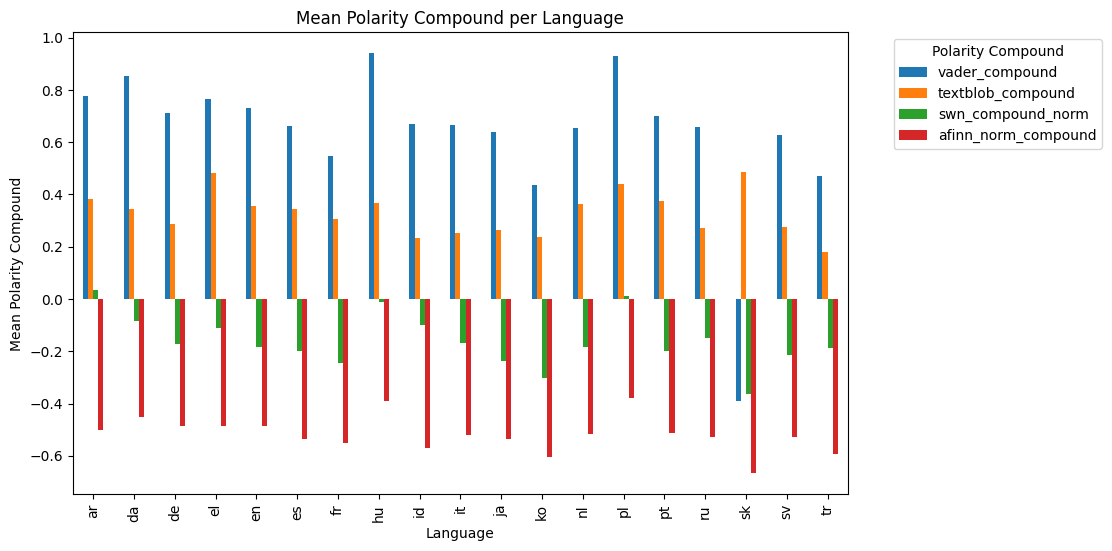

In [47]:
means_by_lang = data.groupby('language')[compare].mean()

# Plot the means
ax = means_by_lang.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Polarity Compound per Language')
plt.xlabel('Language')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From this visualisation we can see there are no clear differences between language in terms of polarity values. Nonetheless, it worth highlighting Hungarian and Polish Reviews, with a very high *Vader* compound. Since there are only 1 and 3 observations for these languages respectively, not many conclusions can be taken.

**Polarity Variation per Language across Time**

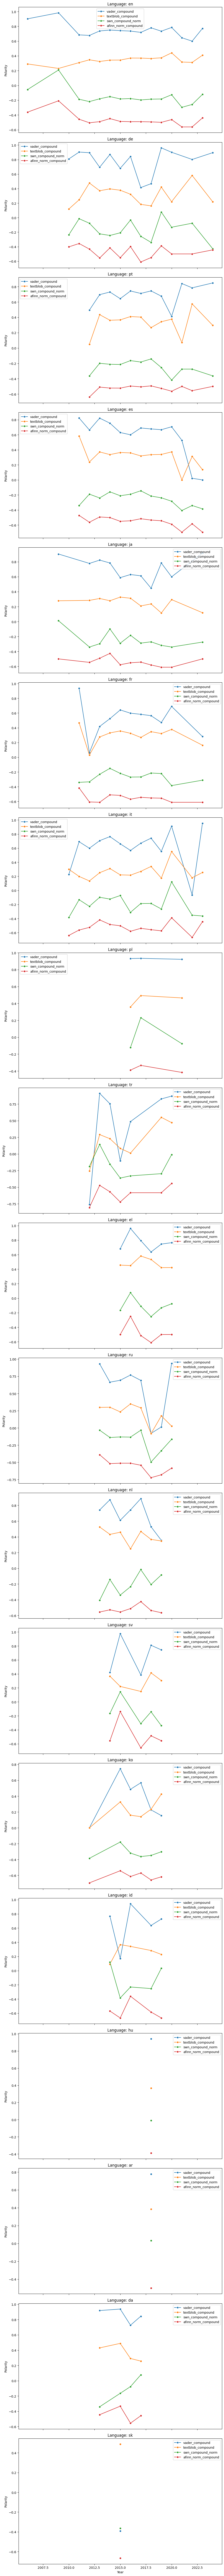

In [48]:
languages = data['language'].unique()

fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(10, 6*len(languages)), sharex=True)

for i, language in enumerate(languages):
    language_data = data[data['language'] == language]
    ax = axes[i]
    
    for compound in compare:
        sns.lineplot(x='Year', y=compound, data=language_data, ax=ax, label=compound, marker='o', ci=None)
    
    ax.set_title(f'Language: {language}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Polarity')
    ax.legend()

plt.tight_layout()
plt.show()

**Polarity Variation per Published Platform across Time**

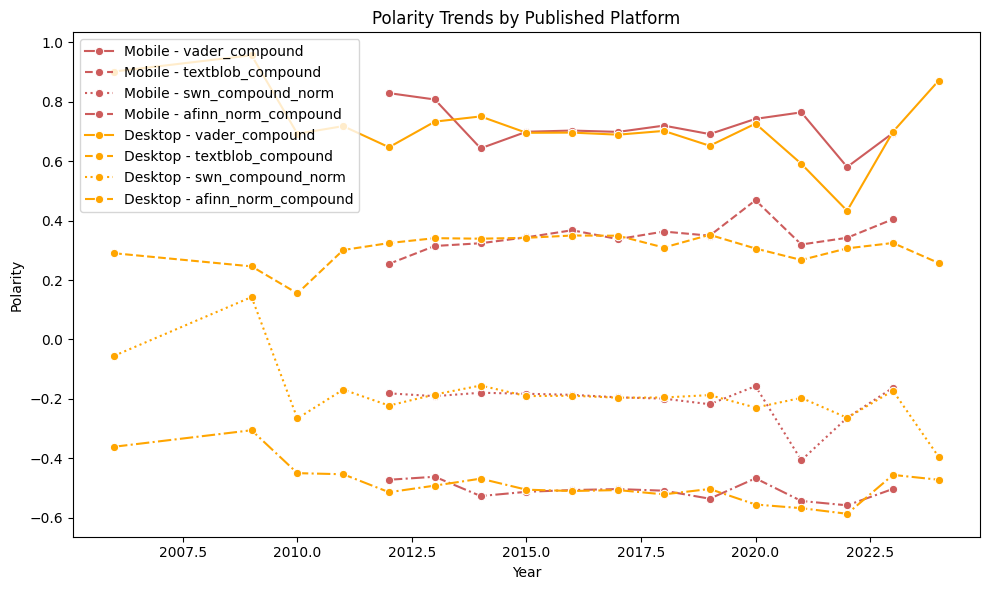

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each platform
for platform, color in zip(data['published_platform'].unique(), ['indianred', 'orange']):
    platform_data = data[data['published_platform'] == platform]
    
    # Plot each compound for the current platform with a different linestyle or color
    for compound, linestyle in zip(compare, ['-', '--', ':', '-.']):
        sns.lineplot(x='Year', y=compound, data=platform_data, ax=ax, label=f'{platform} - {compound}', marker='o', ci=None, linestyle=linestyle, color=color)

ax.set_title('Polarity Trends by Published Platform')
ax.set_xlabel('Year')
ax.set_ylabel('Polarity')
ax.legend()

plt.tight_layout()
plt.show()


**Polarity Variation per Rating across Time**

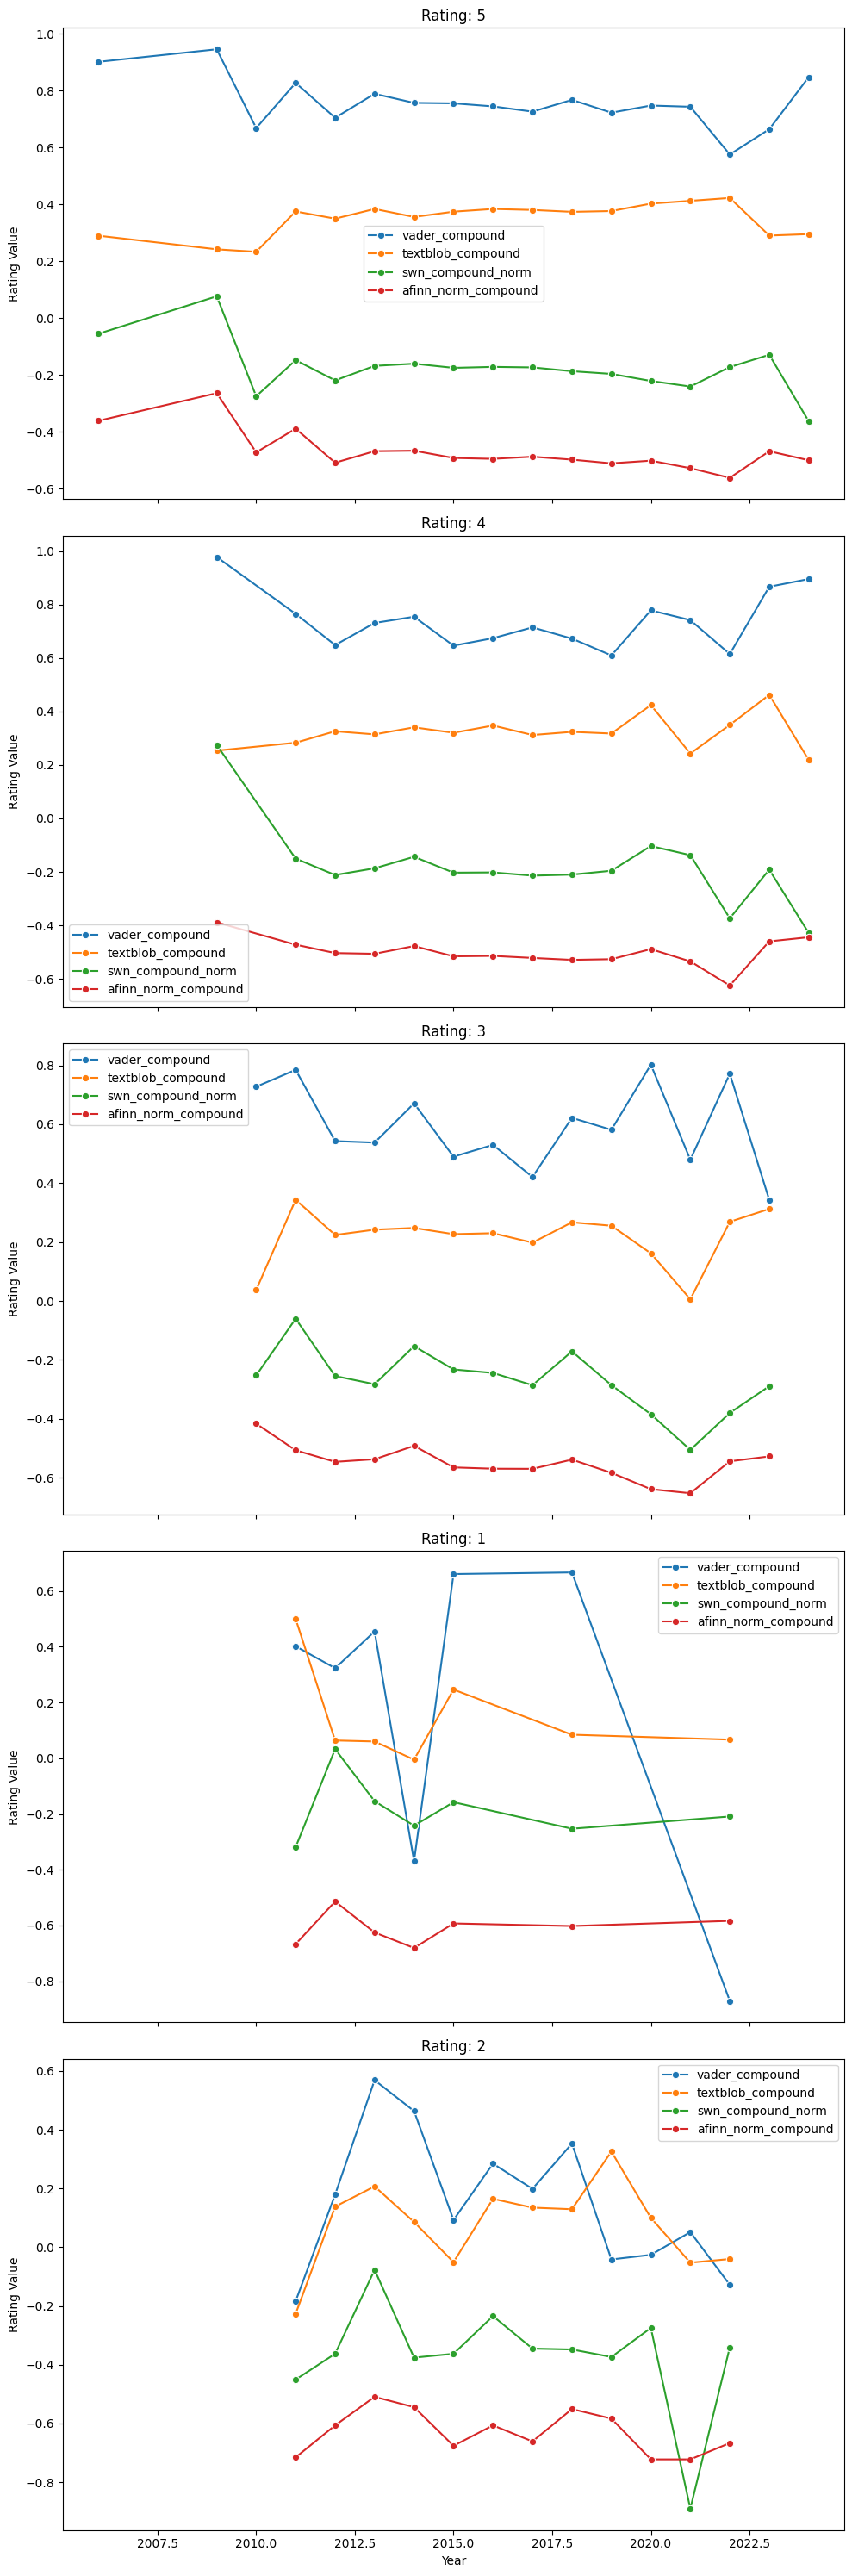

In [50]:
ratings = data['rating'].unique()

# Create subplots for each rating
fig, axes = plt.subplots(nrows=len(ratings), ncols=1, figsize=(10, 6*len(ratings)), sharex=True)

for i, rating in enumerate(ratings):
    rating_data = data[data['rating'] == rating]
    ax = axes[i]
    
    for compound in compare:
        sns.lineplot(x='Year', y=compound, data=rating_data, ax=ax, label=compound, marker='o', ci=None)
    
    ax.set_title(f'Rating: {rating}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rating Value')
    ax.legend()

plt.tight_layout()
plt.show()

**Polarity Comparison with *helpful_votes***

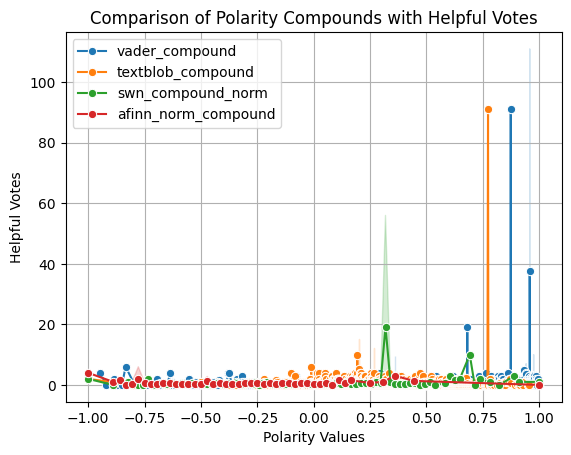

In [51]:
for method in compare:
    sns.lineplot(x=method, y='helpful_votes', data=data, label=method, marker='o')

plt.title('Comparison of Polarity Compounds with Helpful Votes')
plt.xlabel('Polarity Values')
plt.ylabel('Helpful Votes')
plt.legend()
plt.grid(True)
plt.show()

**Polarity per Number of Characters in the Review**

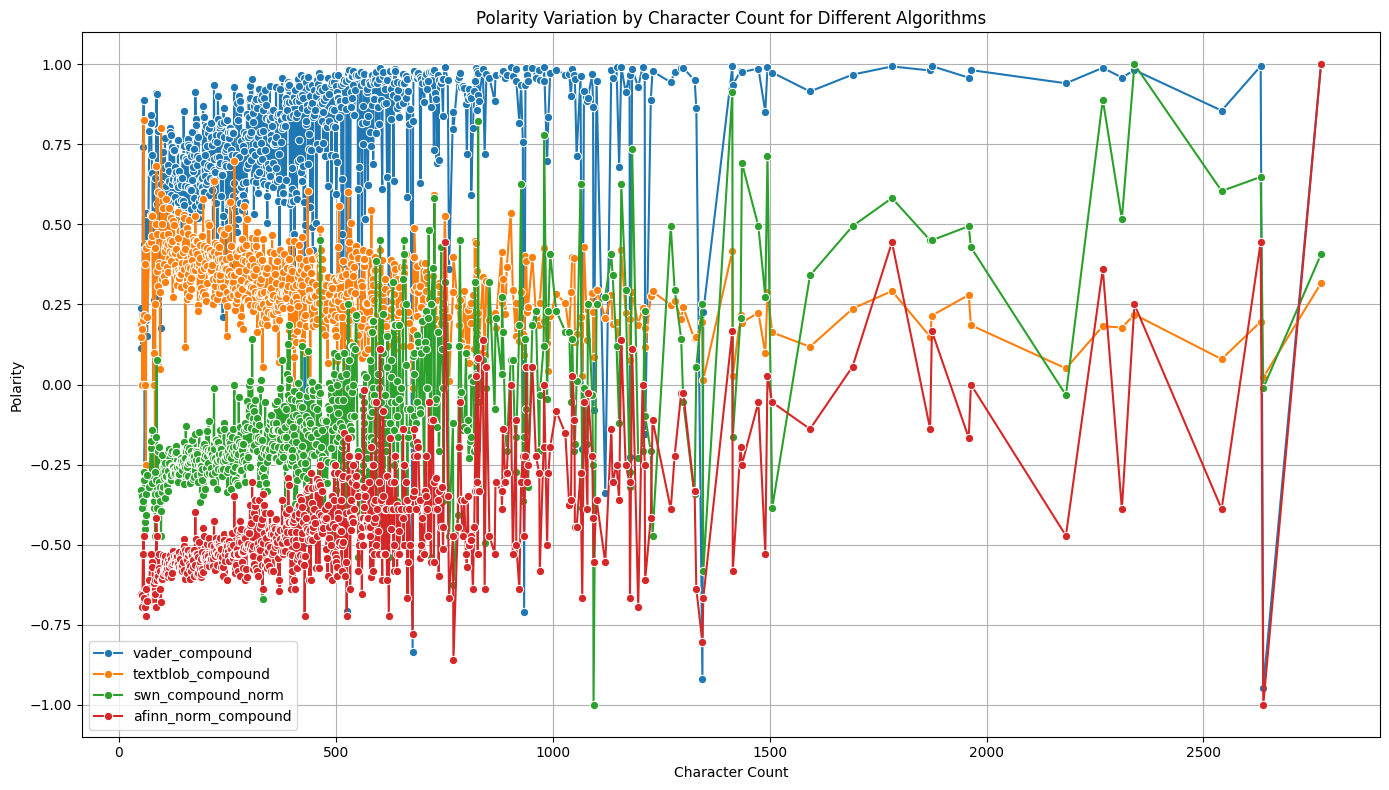

In [55]:
char_count_mean = data.groupby('char_count')[compare].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 8))

for algo in compare:
    sns.lineplot(x='char_count', y=algo, data=char_count_mean, label=algo, marker='o')

plt.title('Polarity Variation by Character Count for Different Algorithms')
plt.xlabel('Character Count')
plt.ylabel('Polarity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From this visualisation we can see that for *SentiWordNet* and *AFINN* algorithms there seams to be and upwards trend as the number of characters in a review increases, even if there appear to be some outliers. A similar thing happens with the *Vader* compound. However, when looking at *TextBlob* Algorithm, the opposite appears to happen. with a downwards trend. 

Consequently, it is hard to take significant conclusions from this visualisation.

### 6.1 Negative Reviews Exploration

## 7. AI Statement